#Regularization Techniques for Deep Learning Models

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers# type: ignore
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

**Load and preprocess the CIFAR-10 dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)

**Define CNN model with regularization**

In [4]:
def create_model(regularization=None):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3),kernel_regularizer=regularization))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularization))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularization))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularization))
    model.add(layers.Dense(10, activation='softmax'))
    return model

**Train and evaluate model with L1 regularization (Lasso)**

In [5]:
# (strength=0.001)
model_l1_001 = create_model(regularizers.l1(0.001))
model_l1_001.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l1_001 = model_l1_001.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l1_001_accuracy = model_l1_001.evaluate(x_test, y_test)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.2209 - loss: 3.0138 - val_accuracy: 0.2798 - val_loss: 2.1015
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.2927 - loss: 2.0817 - val_accuracy: 0.3721 - val_loss: 1.8928
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3783 - loss: 1.8744 - val_accuracy: 0.3941 - val_loss: 1.8469
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4014 - loss: 1.8040 - val_accuracy: 0.4235 - val_loss: 1.7494
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4225 - loss: 1.7538 - val_accuracy: 0.4248 - val_loss: 1.7263
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4354 - loss: 1.7136 - val_accuracy: 0.4234 - val_loss: 1.7358
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4375 - loss: 1.6994 - val_accuracy: 0.4545 - val_loss: 1.6573
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4521 - loss: 1.6731 - val_accuracy: 

In [6]:
# (strength=0.01)
model_l1_01 = create_model(regularizers.l1(0.01))
model_l1_01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l1_01 = model_l1_01.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l1_01_accuracy = model_l1_01.evaluate(x_test, y_test)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.1028 - loss: 8.8690 - val_accuracy: 0.1000 - val_loss: 2.4522
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0995 - loss: 2.4527 - val_accuracy: 0.1000 - val_loss: 2.4522
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1029 - loss: 2.4527 - val_accuracy: 0.1000 - val_loss: 2.4535
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0983 - loss: 2.4527 - val_accuracy: 0.1000 - val_loss: 2.4512
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0969 - loss: 2.4526 - val_accuracy: 0.1000 - val_loss: 2.4533
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0974 - loss: 2.4527 - val_accuracy: 0.1000 - val_loss: 2.4529
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0969 - loss: 2.4527 - val_accuracy: 0.1000 - val_loss: 2.4530
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0975 - loss: 2.4526 - val_accuracy: 0.

In [7]:
# (strength=0.1)
model_l1_1 = create_model(regularizers.l1(0.1))
model_l1_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l1_1 = model_l1_1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l1_1_accuracy = model_l1_1.evaluate(x_test, y_test)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.0958 - loss: 67.3684 - val_accuracy: 0.1000 - val_loss: 3.8136
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.0985 - loss: 3.8108 - val_accuracy: 0.1000 - val_loss: 3.8075
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0995 - loss: 3.8101 - val_accuracy: 0.1000 - val_loss: 3.8189
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.0964 - loss: 3.8105 - val_accuracy: 0.1000 - val_loss: 3.8032
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0984 - loss: 3.8099 - val_accuracy: 0.1000 - val_loss: 3.8169
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0969 - loss: 3.8102 - val_accuracy: 0.1000 - val_loss: 3.8150
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0959 - loss: 3.8101 - val_accuracy: 0.1000 - val_loss: 3.8100
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0986 - loss: 3.8097 - val_accuracy: 0

**Train and evaluate model with L2 regularization (Ridge)**

In [8]:
# (strength=0.001)
model_l2_001 = create_model(regularizers.l2(0.001))
model_l2_001.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l2_001 = model_l2_001.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l2_001_accuracy = model_l2_001.evaluate(x_test, y_test)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3124 - loss: 1.9440 - val_accuracy: 0.5018 - val_loss: 1.4652
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5235 - loss: 1.4229 - val_accuracy: 0.5762 - val_loss: 1.2924
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5865 - loss: 1.2840 - val_accuracy: 0.6240 - val_loss: 1.1856
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6180 - loss: 1.2159 - val_accuracy: 0.6401 - val_loss: 1.1541
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6457 - loss: 1.1364 - val_accuracy: 0.6583 - val_loss: 1.1227
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6678 - loss: 1.0932 - val_accuracy: 0.6652 - val_loss: 1.1015
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6850 - loss: 1.0508 - val_accuracy: 0.6699 - val_loss: 1.0871
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6903 - loss: 1.0383 - val_accuracy: 0.

In [9]:
# (strength=0.01)
model_l2_01 = create_model(regularizers.l2(0.01))
model_l2_01.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l2_01 = model_l2_01.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l2_01_accuracy = model_l2_01.evaluate(x_test, y_test)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.2495 - loss: 2.4328 - val_accuracy: 0.3947 - val_loss: 1.8569
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.3944 - loss: 1.8277 - val_accuracy: 0.4196 - val_loss: 1.7446
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4443 - loss: 1.7284 - val_accuracy: 0.4706 - val_loss: 1.6860
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4708 - loss: 1.6680 - val_accuracy: 0.4903 - val_loss: 1.6125
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4852 - loss: 1.6365 - val_accuracy: 0.4994 - val_loss: 1.6021
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5013 - loss: 1.6089 - val_accuracy: 0.5272 - val_loss: 1.5456
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5180 - loss: 1.5755 - val_accuracy: 0.4767 - val_loss: 1.6951
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5267 - loss: 1.5554 - val_accuracy: 0.

In [10]:
# (strength=0.1)
model_l2_1 = create_model(regularizers.l2(0.1))
model_l2_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_l2_1 = model_l2_1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)
model_l2_1_accuracy = model_l2_1.evaluate(x_test, y_test)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.1007 - loss: 5.0197 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0984 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1011 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1015 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.0979 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1005 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0995 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1025 - loss: 2.3027 - val_accuracy: 0.

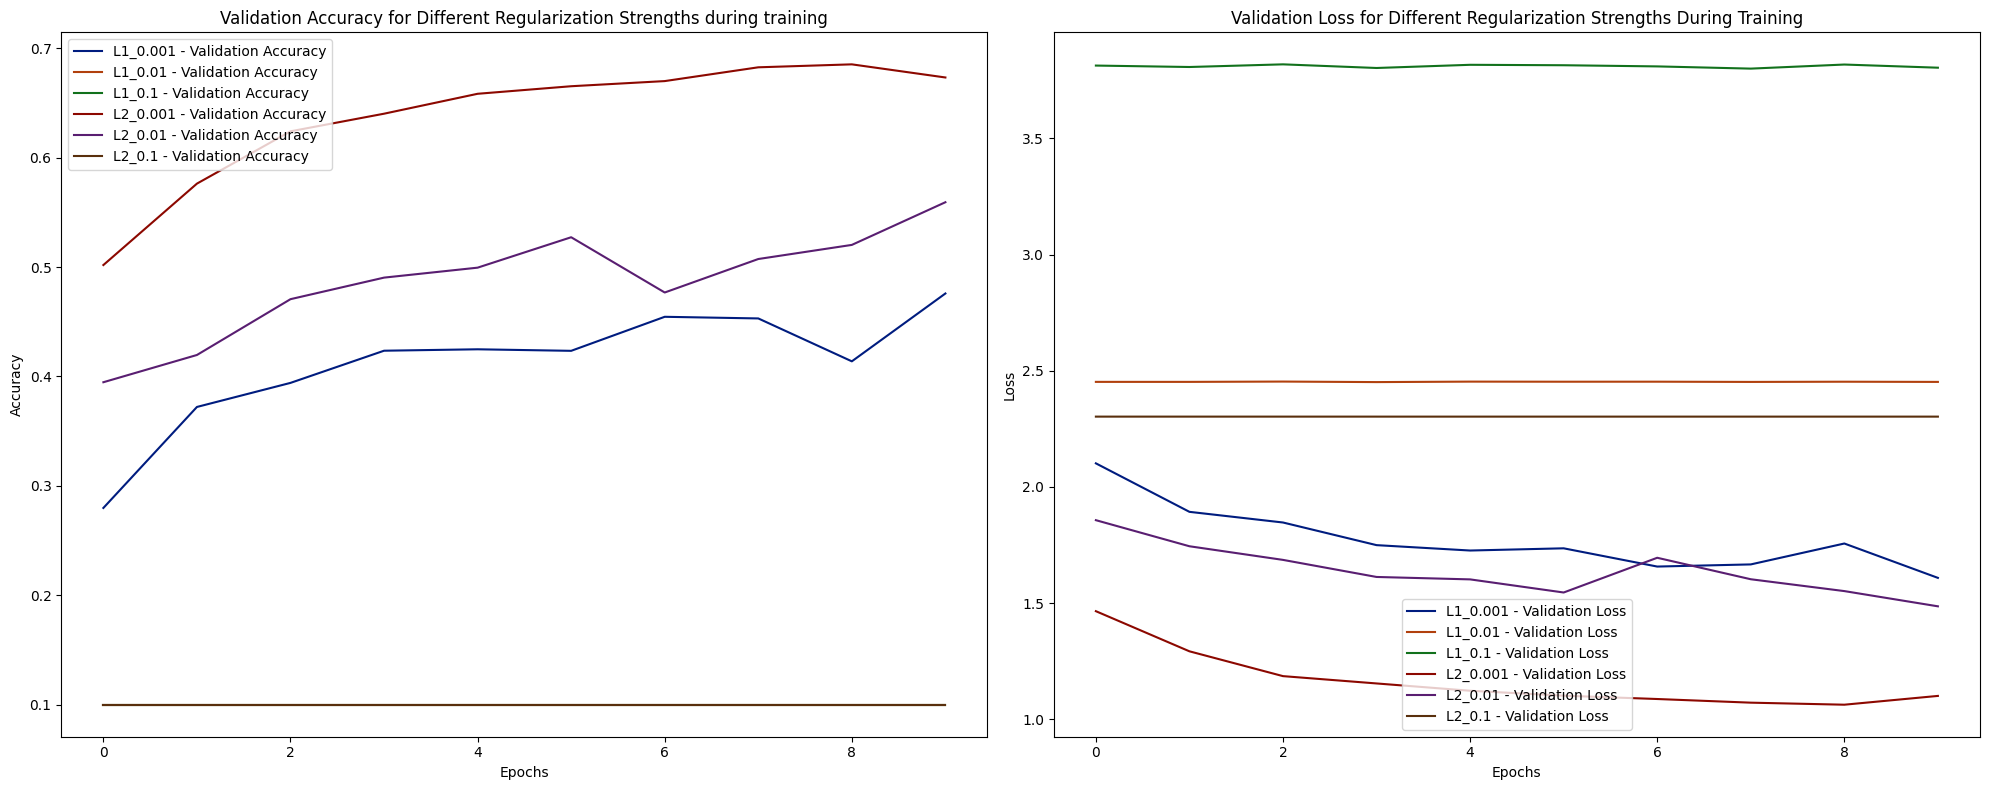

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# First subplot - Validation Accuracy
sns.lineplot(ax=axes[0], data=history_l1_001.history['val_accuracy'], label='L1_0.001 - Validation Accuracy')
sns.lineplot(ax=axes[0], data=history_l1_01.history['val_accuracy'], label='L1_0.01 - Validation Accuracy')
sns.lineplot(ax=axes[0], data=history_l1_1.history['val_accuracy'], label='L1_0.1 - Validation Accuracy')
sns.lineplot(ax=axes[0], data=history_l2_001.history['val_accuracy'], label='L2_0.001 - Validation Accuracy')
sns.lineplot(ax=axes[0], data=history_l2_01.history['val_accuracy'], label='L2_0.01 - Validation Accuracy')
sns.lineplot(ax=axes[0], data=history_l2_1.history['val_accuracy'], label='L2_0.1 - Validation Accuracy')

# Set titles and labels for the first plot
axes[0].set_title('Validation Accuracy for Different Regularization Strengths during training')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Second subplot - Validation Loss
sns.lineplot(ax=axes[1], data=history_l1_001.history['val_loss'], label='L1_0.001 - Validation Loss')
sns.lineplot(ax=axes[1], data=history_l1_01.history['val_loss'], label='L1_0.01 - Validation Loss')
sns.lineplot(ax=axes[1], data=history_l1_1.history['val_loss'], label='L1_0.1 - Validation Loss')
sns.lineplot(ax=axes[1], data=history_l2_001.history['val_loss'], label='L2_0.001 - Validation Loss')
sns.lineplot(ax=axes[1], data=history_l2_01.history['val_loss'], label='L2_0.01 - Validation Loss')
sns.lineplot(ax=axes[1], data=history_l2_1.history['val_loss'], label='L2_0.1 - Validation Loss')

# Set titles and labels for the second plot
axes[1].set_title('Validation Loss for Different Regularization Strengths During Training')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [15]:
accuracies = [model_l1_001_accuracy[1], model_l1_01_accuracy [1], model_l2_1_accuracy[1], model_l2_001_accuracy[1], model_l2_01_accuracy[1], model_l2_1_accuracy[1]]
losses = [model_l1_001_accuracy[0], model_l1_01_accuracy [0], model_l2_1_accuracy[0], model_l2_001_accuracy[0], model_l2_01_accuracy[0], model_l2_1_accuracy[0]]
labels = ['L1_0.001', 'L1_0.01','L1_0.1', 'L2_0.001', 'L2_0.01', 'L2_0.1']
data = pd.DataFrame({
    'Regularization': labels,
    'Accuracy': accuracies,
    'Loss': losses
})
print(data)

  Regularization  Accuracy      Loss
0       L1_0.001    0.4758  1.608566
1        L1_0.01    0.1000  2.452034
2         L1_0.1    0.1000  2.302605
3       L2_0.001    0.6732  1.100499
4        L2_0.01    0.5592  1.486099
5         L2_0.1    0.1000  2.302605


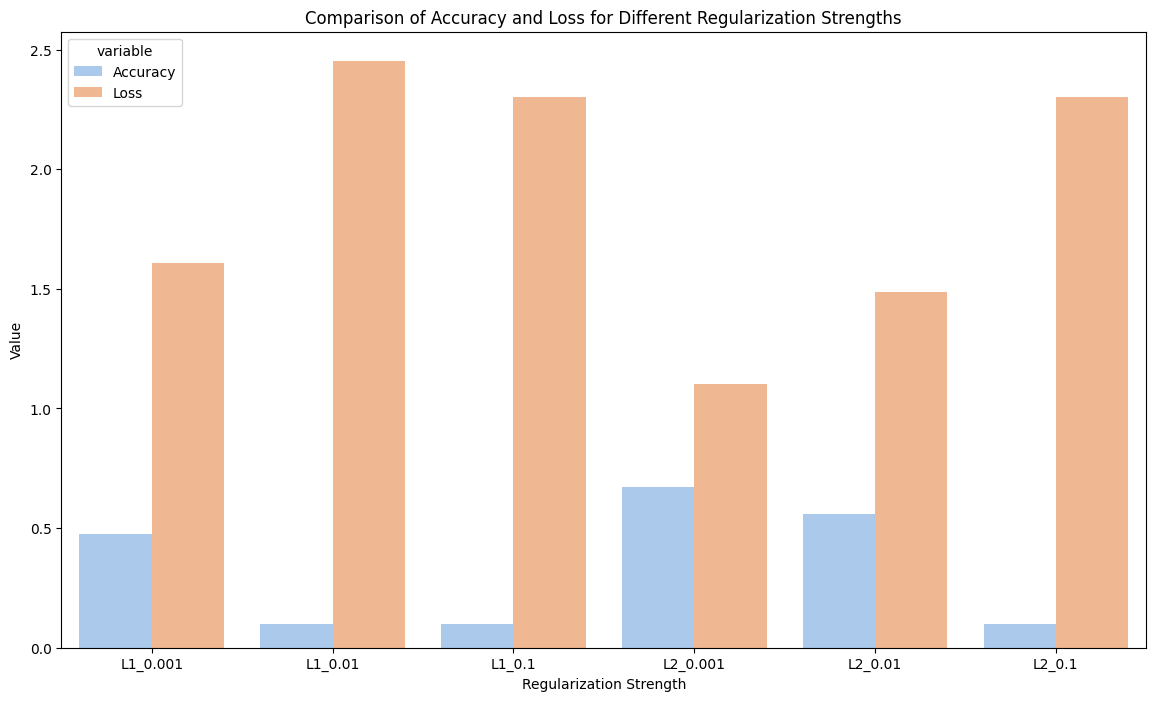

In [20]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Regularization', y='value', hue='variable', data=pd.melt(data, ['Regularization']))
plt.title('Comparison of Accuracy and Loss for Different Regularization Strengths')
plt.ylabel('Value')
plt.xlabel('Regularization Strength')
plt.show()

In [21]:
labels = ['L1_0.001', 'L1_0.01', 'L1_0.1', 'L2_0.001', 'L2_0.01', 'L2_0.1']
x = np.arange(len(labels))
train_accuracies = [
    history_l1_001.history['accuracy'][-1], history_l1_01.history['accuracy'][-1], history_l1_1.history['accuracy'][-1],
    history_l2_001.history['accuracy'][-1], history_l2_01.history['accuracy'][-1], history_l2_1.history['accuracy'][-1]
]

train_losses = [
    history_l1_001.history['loss'][-1], history_l1_01.history['loss'][-1], history_l1_1.history['loss'][-1],
    history_l2_001.history['loss'][-1], history_l2_01.history['loss'][-1], history_l2_1.history['loss'][-1]
]

eval_accuracies = [
    model_l1_001_accuracy[1], model_l1_01_accuracy[1], model_l1_1_accuracy[1],
    model_l2_001_accuracy[1], model_l2_01_accuracy[1], model_l2_1_accuracy[1]
]

eval_losses = [
    model_l1_001_accuracy[0], model_l1_01_accuracy[0], model_l1_1_accuracy[0],
    model_l2_001_accuracy[0], model_l2_01_accuracy[0], model_l2_1_accuracy[0]
]
data = {
    'Regularization': ['L1_0.001', 'L1_0.01', 'L1_0.1', 'L2_0.001', 'L2_0.01', 'L2_0.1'],
    'Training Accuracy': train_accuracies,
    'Evaluation Accuracy': eval_accuracies,
    'Training Loss': train_losses,
    'Evaluation Loss': eval_losses
}

# Create a DataFrame
df = pd.DataFrame(data)

# Print the table
print(df)

  Regularization  Training Accuracy  Evaluation Accuracy  Training Loss  \
0       L1_0.001            0.46812               0.4758       1.630120   
1        L1_0.01            0.09712               0.1000       2.452675   
2         L1_0.1            0.09734               0.1000       3.810028   
3       L2_0.001            0.71222               0.6732       0.987648   
4        L2_0.01            0.55256               0.5592       1.508887   
5         L2_0.1            0.09970               0.1000       2.302720   

   Evaluation Loss  
0         1.608566  
1         2.452034  
2         3.804476  
3         1.100499  
4         1.486099  
5         2.302605  


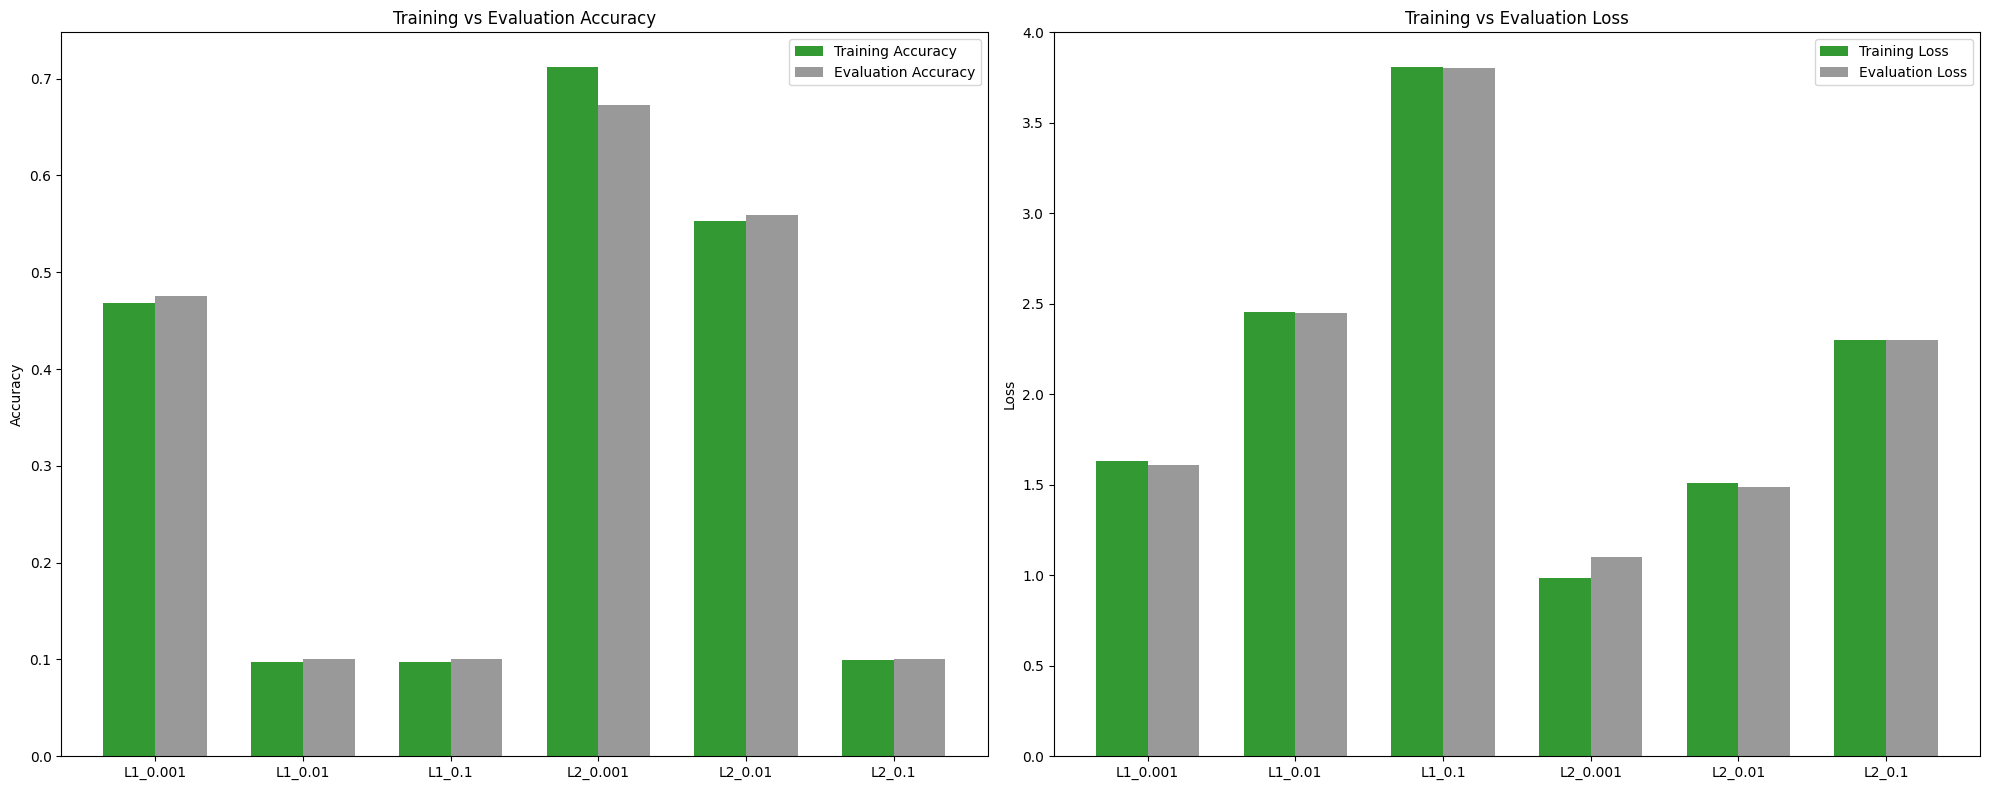

In [25]:
width = 0.35

fig, axes = plt.subplots(1, 2, figsize=(20, 8))


axes[0].bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='green', alpha=0.8)
axes[0].bar(x + width/2, eval_accuracies, width, label='Evaluation Accuracy', color='grey', alpha=0.8)
axes[0].set_title('Training vs Evaluation Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels)
axes[0].legend()

axes[1].bar(x - width/2, train_losses, width, label='Training Loss', color='green', alpha=0.8)
axes[1].bar(x + width/2, eval_losses, width, label='Evaluation Loss', color='grey', alpha=0.8)
axes[1].set_title('Training vs Evaluation Loss')
axes[1].set_ylabel('Loss')
axes[1].set_xticks(x)
axes[1].set_xticklabels(labels)
axes[1].legend()

plt.tight_layout()
plt.show()